In [122]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
#Loading Data
matches=pd.read_csv('matches.csv')
deliveries = pd.read_csv("deliveries.csv")

In [124]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [125]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [126]:
matches.shape

(756, 18)

In [127]:
deliveries.shape

(179078, 21)

In [128]:
#calculating null values
matches.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [129]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [130]:
#Droping columns with more than 90% null values
matches=matches.drop(['umpire3'],axis=1)
deliveries=deliveries.drop(['player_dismissed','dismissal_kind','fielder'],axis=1)

In [131]:
#Replacing null values
matches['city']=matches['city'].fillna('Unknown')
matches['winner']=matches['winner'].fillna("No Result")
matches['player_of_match']=matches['player_of_match'].fillna('Unknown')
matches['umpire1']=matches['umpire1'].fillna('Unknown')
matches['umpire2']=matches['umpire2'].fillna('Unknown')

In [132]:
#Removing Duplicates
matches=matches.drop_duplicates().reset_index(drop=True)
deliveries=deliveries.drop_duplicates().reset_index(drop=True)

In [133]:
#Summary
num_seasons=matches['season'].nunique()
num_matches=matches.shape[0]
num_innings=matches['id'].nunique()
num_deliveries=deliveries.shape[0]

print("Number of Seasons:",num_seasons)
print("Number of Matches:",num_matches)
print("Number of Innings:",num_innings*2)
print("Number of Deliveries:",num_deliveries)

Number of Seasons: 12
Number of Matches: 756
Number of Innings: 1512
Number of Deliveries: 179054


In [134]:
# Ensure columns exist and are numeric
matches['win_by_runs'] = pd.to_numeric(matches['win_by_runs'], errors='coerce').fillna(0).astype(int)
matches['win_by_wickets'] = pd.to_numeric(matches['win_by_wickets'], errors='coerce').fillna(0).astype(int)


# Which team won by Maximum runs?

In [135]:
if matches['win_by_runs'].sum() > 0:
    max_runs = matches.loc[matches['win_by_runs'].idxmax()]
    # correct opponent selection
    if max_runs['winner'] == max_runs['team1']:
        opponent = max_runs['team2']
    else:
        opponent = max_runs['team1']
    print(f"Max runs win: '{max_runs['winner']}' won by {max_runs['win_by_runs']} runs against '{opponent}' (match id {max_runs['id']})")
else:
    print("No matches with run wins present.")

Max runs win: 'Mumbai Indians' won by 146 runs against 'Delhi Daredevils' (match id 44)


# Which IPL team won by minimum runs?

In [136]:
positive_runs = matches[matches['win_by_runs'] > 0]
if not positive_runs.empty:
    min_runs = positive_runs.loc[positive_runs['win_by_runs'].idxmin()]
    if min_runs['winner'] == min_runs['team1']:
        opponent = min_runs['team2']
    else:
        opponent = min_runs['team1']
    print(f"Min runs win: '{min_runs['winner']}' won by {min_runs['win_by_runs']} runs against '{opponent}' (match id {min_runs['id']})")
else:
    print("No run-win records found.")

Min runs win: 'Mumbai Indians' won by 1 runs against 'Rising Pune Supergiant' (match id 59)


# Which team won by consuming maximum wickets?

In [137]:
if matches['win_by_wickets'].sum() > 0:
    max_wickets = matches.loc[matches['win_by_wickets'].idxmax()]
    if max_wickets['winner'] == max_wickets['team1']:
        opponent = max_wickets['team2']
    else:
        opponent = max_wickets['team1']
    print(f"Max wickets win: '{max_wickets['winner']}' won by {max_wickets['win_by_wickets']} wickets against '{opponent}' (match id {max_wickets['id']})")
else:
    print("No wicket-win data available.")

Max wickets win: 'Kolkata Knight Riders' won by 10 wickets against 'Gujarat Lions' (match id 3)


# Which team won by consuming minimum wickets?

In [138]:
positive_wickets = matches[matches['win_by_wickets'] > 0]
if not positive_wickets.empty:
    min_wickets = positive_wickets.loc[positive_wickets['win_by_wickets'].idxmin()]
    if min_wickets['winner'] == min_wickets['team1']:
        opponent = min_wickets['team2']
    else:
        opponent = min_wickets['team1']
    print(f"Min positive wickets win: '{min_wickets['winner']}' won by {min_wickets['win_by_wickets']} wickets against '{opponent}' (match id {min_wickets['id']})")
else:
    print("No positive wicket-win records found.")

Min positive wickets win: 'Kolkata Knight Riders' won by 1 wickets against 'Kings XI Punjab' (match id 560)


# Which season consisted of the highest number of matches ever played ?

In [139]:
matches_by_season=matches.groupby('season').size().sort_values(ascending=False)
print(f"Season with highest matches:{matches_by_season.index[0]} matches:{matches_by_season.iloc[0]}")

Season with highest matches:2013 matches:76


 # Which is the most successful IPL team with all the data at hand?

In [140]:
# By number of wins
wins_by_teams=matches['winner'].value_counts()
print("Wins By teams:\n",wins_by_teams.head(10))
print("Most successful team:",wins_by_teams.index[0],",Total wins:",wins_by_teams.iloc[0])

Wins By teams:
 winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: count, dtype: int64
Most successful team: Mumbai Indians ,Total wins: 109


# Visualizations

# Top players of winning matches

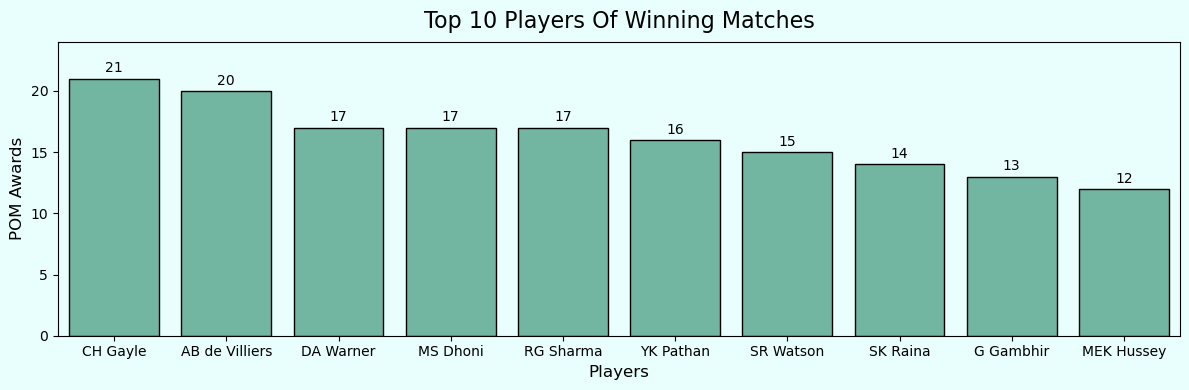

In [141]:
pom_count=matches['player_of_match'].value_counts().sort_values(ascending=False)

fig=plt.figure(figsize=(12,4))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

ax=sns.barplot(x=pom_count.head(10).index,y=pom_count.head(10).values,
    edgecolor='black',
    linewidth=1
    )
sns.set_palette('Set2')

plt.title('Top 10 Players Of Winning Matches',fontsize=16,pad=10)
plt.ylabel('POM Awards',fontsize=12)
plt.xlabel('Players',fontsize=12)
plt.ylim(0, pom_count.head(10).values.max() + 3)

for p in ax.patches:
    value = p.get_height()                      
    x = p.get_x() + p.get_width() / 2               
    y = value + 0.5                               
    ax.text(x, y, int(value), ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

# Matches according to venue

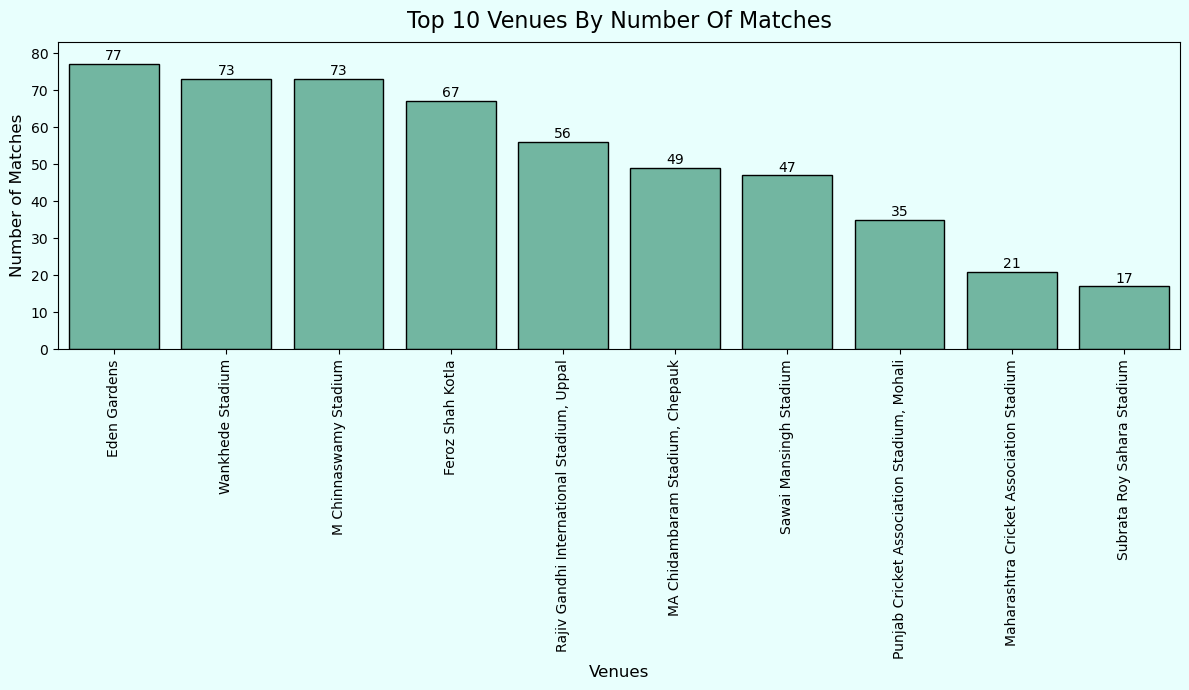

In [142]:
matches_by_venue = matches['venue'].value_counts()

fig=plt.figure(figsize=(12,7))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

ax=sns.barplot(x=matches_by_venue.head(10).index,y=matches_by_venue.head(10).values,
    edgecolor='black',
    linewidth=1
    )
sns.set_palette('Set2')

plt.title('Top 10 Venues By Number Of Matches',fontsize=16,pad=10)
plt.xlabel('Venues',fontsize=12)
plt.ylabel('Number of Matches',fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, matches_by_venue.head(10).values.max() + 6)

for p in ax.patches:
    value = p.get_height()                      
    x = p.get_x() + p.get_width() / 2               
    y = value + 1                               
    ax.text(x, y, int(value), ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()


# #The number of matches played by each team

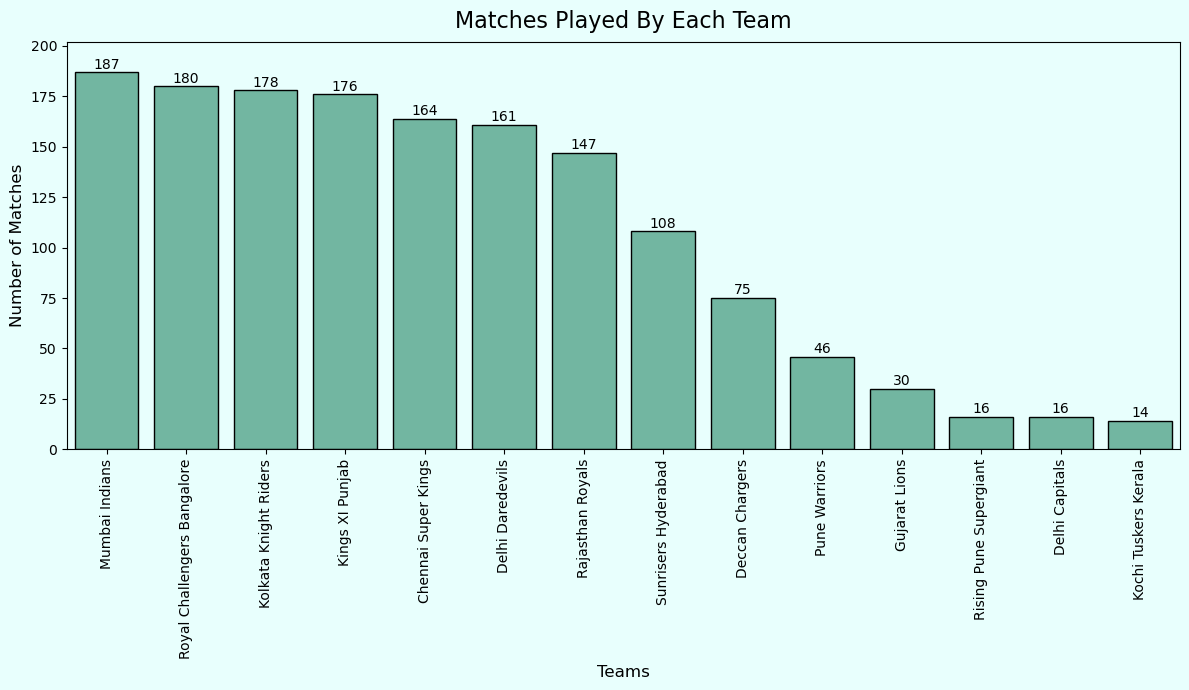

In [143]:
all_teams = sorted(list(set(matches['team1']).union(set(matches['team2']))))
team_matches = {t: ((matches['team1']==t) | (matches['team2']==t)).sum() for t in all_teams}
team_matches = pd.Series(team_matches).sort_values(ascending=False)

fig=plt.figure(figsize=(12,7))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

ax=sns.barplot(x=team_matches.head(14).index,y=team_matches.head(14).values,
    edgecolor='black',
    linewidth=1
    )
sns.set_palette('Set2')

plt.title('Matches Played By Each Team',fontsize=16,pad=10)
plt.xlabel('Teams',fontsize=12)
plt.ylabel('Number of Matches',fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, team_matches.head(10).values.max() + 15)

for p in ax.patches:
    value = p.get_height()                      
    x = p.get_x() + p.get_width() / 2               
    y = value + 1.8                               
    ax.text(x, y, int(value), ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

# The winners in each Season

In [144]:
season_winners = {}
for s in sorted(matches['season'].unique()):
    season_matches = matches[matches['season']==s].copy()
   
    try:
        season_matches['date'] = pd.to_datetime(season_matches['date'], dayfirst=True)
        final_row = season_matches.sort_values('date').iloc[-1]
    except:
        final_row = season_matches.iloc[-1]

    season_winners[s] = final_row['winner']

season_winners = pd.Series(season_winners)
print("Season winners:\n Seasons\tWinners\n", season_winners)


Season winners:
 Seasons	Winners
 2008         Rajasthan Royals
2009          Deccan Chargers
2010      Chennai Super Kings
2011      Chennai Super Kings
2012    Kolkata Knight Riders
2013           Mumbai Indians
2014    Kolkata Knight Riders
2015           Mumbai Indians
2016      Sunrisers Hyderabad
2017           Mumbai Indians
2018      Chennai Super Kings
2019           Mumbai Indians
dtype: object


# IPL Finals venues and winners along with the number of wins.

In [145]:
final_info = []

for s in sorted(matches['season'].unique()):
    season_matches = matches[matches['season'] == s].copy()

    try:
        season_matches['date'] = pd.to_datetime(season_matches['date'], dayfirst=True)
        final_row = season_matches.sort_values('date').iloc[-1]
    except:
        final_row = season_matches.iloc[-1]

    winner = final_row['winner']

    total_wins = season_matches[season_matches['winner'] == winner].shape[0]

    final_info.append({
        'season': s,
        'final_venue': final_row['venue'],
        'final_winner': winner,
        'total_matches_won': total_wins
    })

final_df = pd.DataFrame(final_info)
pd.set_option('display.max_columns', None)

print(final_df.to_string(index=False))

 season                               final_venue          final_winner  total_matches_won
   2008                Dr DY Patil Sports Academy      Rajasthan Royals                 13
   2009                     New Wanderers Stadium       Deccan Chargers                  9
   2010                Dr DY Patil Sports Academy   Chennai Super Kings                  9
   2011           MA Chidambaram Stadium, Chepauk   Chennai Super Kings                 11
   2012           MA Chidambaram Stadium, Chepauk Kolkata Knight Riders                 12
   2013                              Eden Gardens        Mumbai Indians                 13
   2014                     M Chinnaswamy Stadium Kolkata Knight Riders                 11
   2015                              Eden Gardens        Mumbai Indians                 10
   2016                     M Chinnaswamy Stadium   Sunrisers Hyderabad                 11
   2017 Rajiv Gandhi International Stadium, Uppal        Mumbai Indians                 12

# The number of seasons won by each team

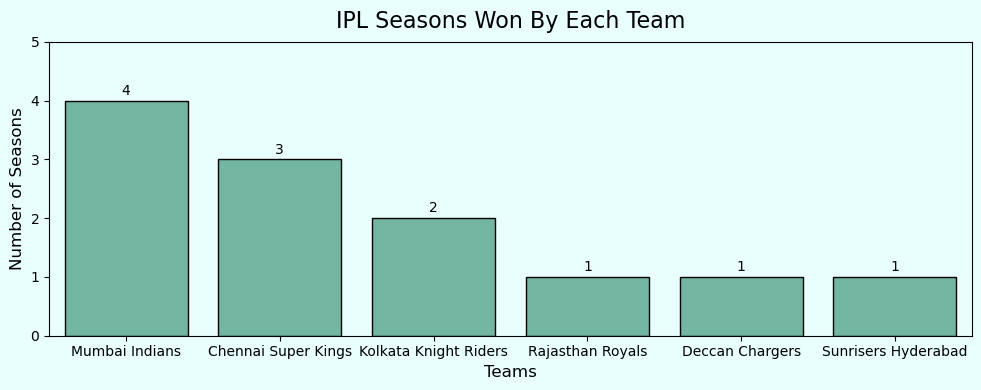

In [146]:
season_won_count=season_winners.value_counts()

fig=plt.figure(figsize=(10,4))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

ax=sns.barplot(x=season_won_count.head(12).index,y=season_won_count.head(12).values,
    edgecolor='black',
    linewidth=1
    )
sns.set_palette('Set2')

plt.title('IPL Seasons Won By Each Team',fontsize=16,pad=10)
plt.xlabel('Teams',fontsize=12)
plt.ylabel('Number of Seasons',fontsize=12)
plt.ylim(0, season_won_count.head(10).values.max()+1 )

for p in ax.patches:
    value = p.get_height()                      
    x = p.get_x() + p.get_width() / 2               
    y = value + 0.1                               
    ax.text(x, y, int(value), ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

# The toss winner, toss decision, winner in final matches

In [147]:
toss_info = []

for s in sorted(matches['season'].unique()):
    season_matches = matches[matches['season'] == s].copy()

    try:
        season_matches['date'] = pd.to_datetime(season_matches['date'], dayfirst=True)
        final_row = season_matches.sort_values('date').iloc[-1]
    except:
        final_row = season_matches.iloc[-1]
        
    toss_info.append({
        'season': s,
        'final_toss_winner': final_row['toss_winner'],
        'final_toss_decision': final_row['toss_decision'],
        'final_match_winner': final_row['winner']
    })

toss_df = pd.DataFrame(toss_info)
pd.set_option('display.max_columns', None)

print(toss_df.to_string(index=False))

 season           final_toss_winner final_toss_decision    final_match_winner
   2008            Rajasthan Royals               field      Rajasthan Royals
   2009 Royal Challengers Bangalore               field       Deccan Chargers
   2010         Chennai Super Kings                 bat   Chennai Super Kings
   2011         Chennai Super Kings                 bat   Chennai Super Kings
   2012         Chennai Super Kings                 bat Kolkata Knight Riders
   2013              Mumbai Indians                 bat        Mumbai Indians
   2014       Kolkata Knight Riders               field Kolkata Knight Riders
   2015         Chennai Super Kings               field        Mumbai Indians
   2016         Sunrisers Hyderabad                 bat   Sunrisers Hyderabad
   2017              Mumbai Indians                 bat        Mumbai Indians
   2018         Chennai Super Kings               field   Chennai Super Kings
   2019              Mumbai Indians                 bat        M

# The man of the match for each final winning team

In [148]:
mom_info = []

for s in sorted(matches['season'].unique()):
    season_matches = matches[matches['season'] == s].copy()

    try:
        season_matches['date'] = pd.to_datetime(season_matches['date'], dayfirst=True)
        final_row = season_matches.sort_values('date').iloc[-1]
    except:
        final_row = season_matches.iloc[-1]

    mom_info.append({
        'season': s,
        'final_winner': final_row['winner'],
        'final_man_of_the_match': final_row['player_of_match']
    })

mom_df = pd.DataFrame(mom_info)
pd.set_option('display.max_columns', None)

print(mom_df.to_string(index=False))

 season          final_winner final_man_of_the_match
   2008      Rajasthan Royals              YK Pathan
   2009       Deccan Chargers               A Kumble
   2010   Chennai Super Kings               SK Raina
   2011   Chennai Super Kings                M Vijay
   2012 Kolkata Knight Riders               MS Bisla
   2013        Mumbai Indians             KA Pollard
   2014 Kolkata Knight Riders              MK Pandey
   2015        Mumbai Indians              RG Sharma
   2016   Sunrisers Hyderabad            BCJ Cutting
   2017        Mumbai Indians              KH Pandya
   2018   Chennai Super Kings              SR Watson
   2019        Mumbai Indians              JJ Bumrah


# Decision in every toss either fielding or batting

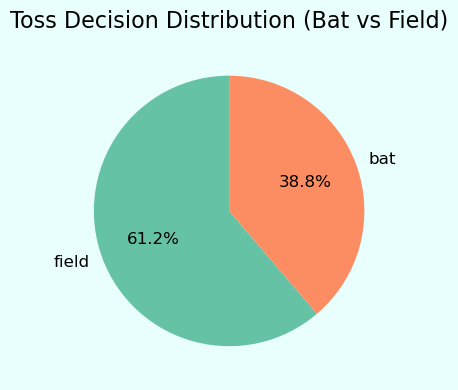

In [149]:
decision_in_toss = matches['toss_decision'].value_counts()

plt.figure(figsize=(8, 4))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

plt.pie(
    decision_in_toss.values,
    labels=decision_in_toss.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.set_palette('Set2'),
    textprops={'fontsize': 12}
)

plt.title('Toss Decision Distribution (Bat vs Field)', fontsize=16, pad=10)
plt.tight_layout()
plt.show()

# What is the probability of winning a match if the toss was won?

In [150]:
prob_win_given_toss = (matches['toss_winner'] == matches['winner']).sum() / matches.shape[0]
print("Probability of team that won toss also wins match:", prob_win_given_toss)

Probability of team that won toss also wins match: 0.5198412698412699


# The total runs by fours hit and the total number of fours hit by each team

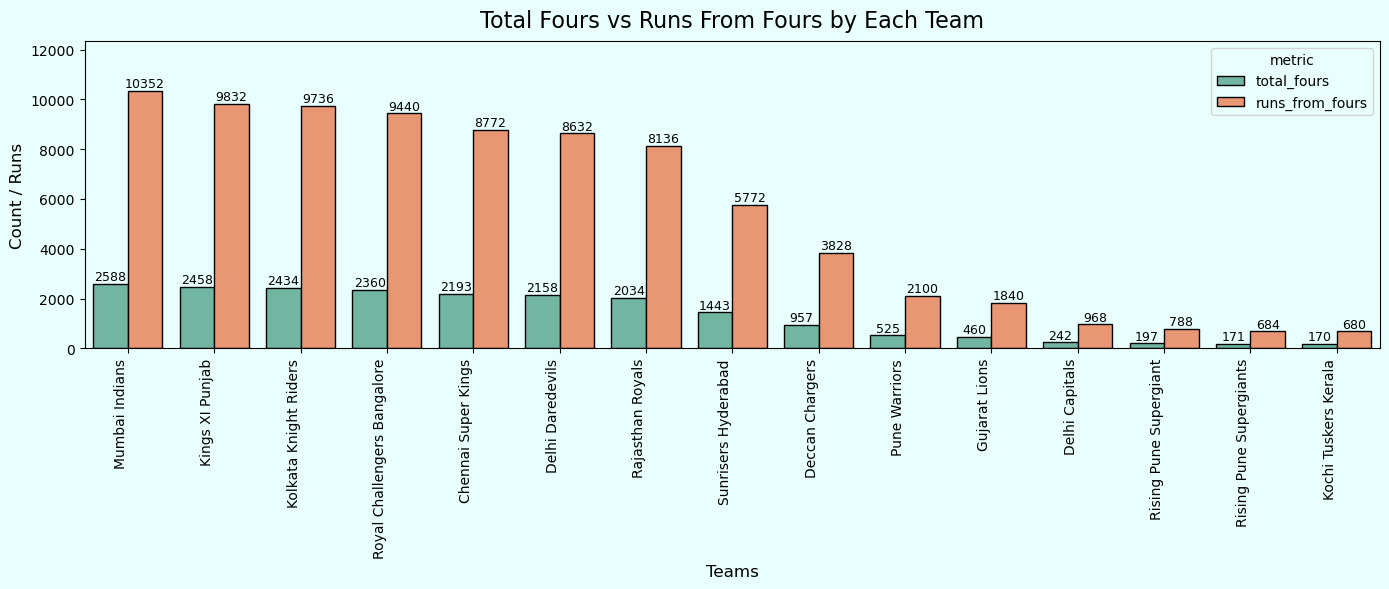

In [151]:
deliveries['is_four'] = deliveries['batsman_runs'] == 4
fours_by_team = deliveries[deliveries['is_four']].groupby('batting_team').size().sort_values(ascending=False)
fours_runs_by_team = fours_by_team * 4

four_data = pd.DataFrame({
    'total_fours': fours_by_team,
    'runs_from_fours': fours_runs_by_team
})

four_data_reset = four_data.reset_index().rename(columns={'batting_team': 'team'})

plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

sns.set_palette('Set2')

four_melt = four_data_reset.melt(
    id_vars='team',
    value_vars=['total_fours', 'runs_from_fours'],
    var_name='metric',
    value_name='value'
)

ax = sns.barplot(data=four_melt, x='team', y='value', hue='metric', edgecolor='black')

plt.title('Total Fours vs Runs From Fours by Each Team', fontsize=16, pad=10)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Count / Runs', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, four_melt['value'].max() + 2000)

for p in ax.patches:
    height = p.get_height()
    if height < 1:
        continue  
    x = p.get_x() + p.get_width() / 2
    y = height + 150
    ax.text(x, y, int(height), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# The fours hit by players

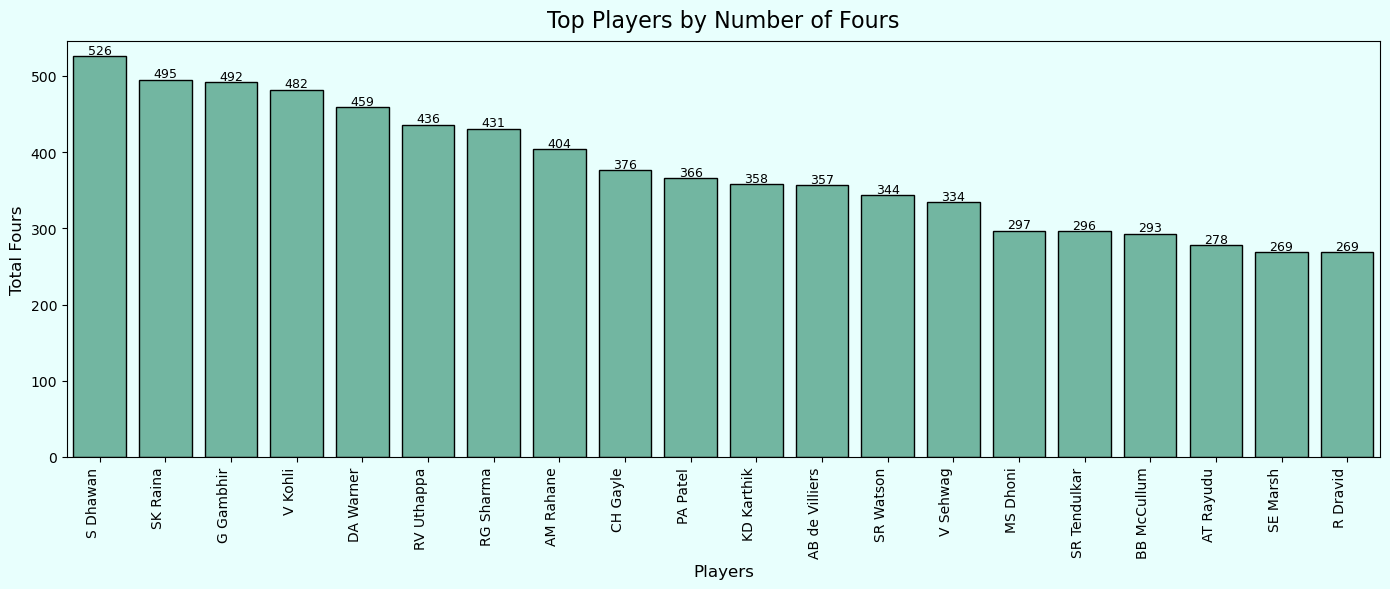

In [152]:
deliveries['is_four'] = deliveries['batsman_runs'] == 4

fours_by_player = (
    deliveries[deliveries['is_four']]
    .groupby('batsman')
    .size()
    .sort_values(ascending=False)
)

four_player_df = fours_by_player.reset_index()
four_player_df.columns = ['player', 'total_fours']

plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'

sns.set_palette('Set2')

# Barplot
ax = sns.barplot(
    data=four_player_df.head(20),   
    x='player',
    y='total_fours',
    edgecolor='black'
)

plt.title('Top Players by Number of Fours', fontsize=16, pad=10)
plt.xlabel('Players', fontsize=12)
plt.ylabel('Total Fours', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, four_player_df['total_fours'].max() + 20)

# Add value labels
for p in ax.patches:
    height = p.get_height()
    if height < 1:
        continue
    x = p.get_x() + p.get_width() / 2
    y = height + 3
    ax.text(x, y, int(height), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# The number of fours hit in each season

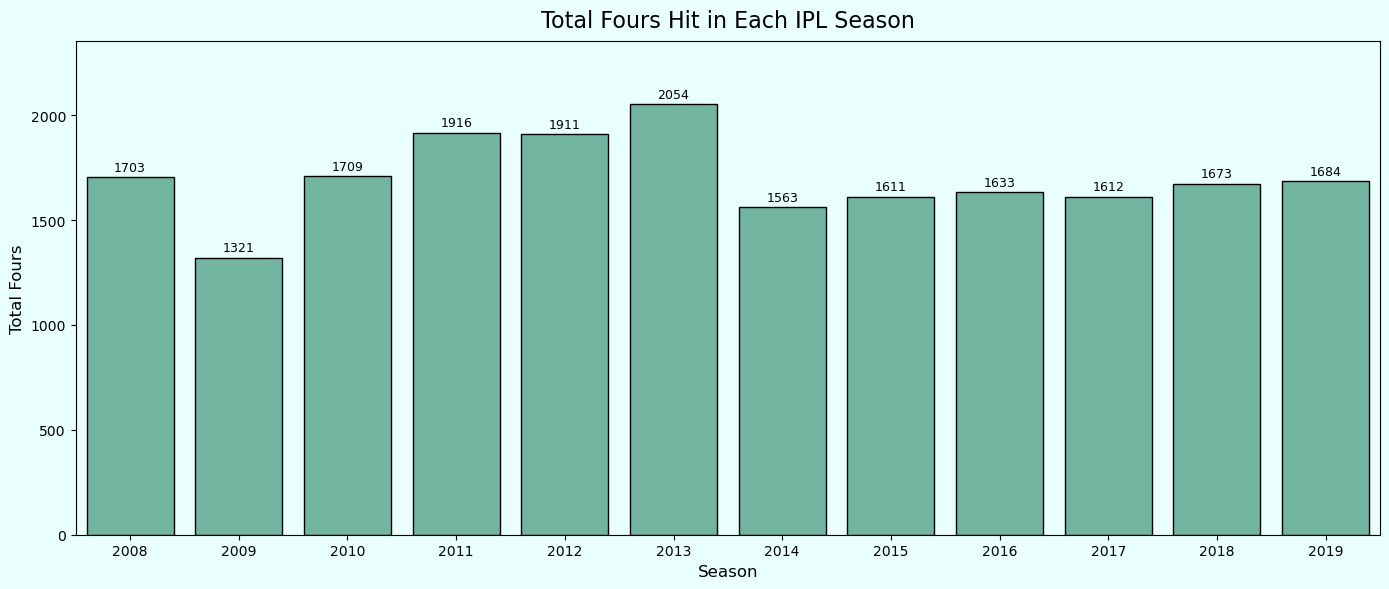

In [153]:
deliveries['is_four'] = deliveries['batsman_runs'] == 4

deliveries_with_season = deliveries.merge(
    matches[['id', 'season']],
    left_on='match_id',
    right_on='id',
    how='left'
)

fours_by_season = (
    deliveries_with_season[deliveries_with_season['is_four']]
    .groupby('season')
    .size()
    .sort_index()
)

fours_season_df = fours_by_season.reset_index()
fours_season_df.columns = ['season', 'total_fours']

plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'
sns.set_palette('Set2')

ax = sns.barplot(
    data=fours_season_df,
    x='season',
    y='total_fours',
    edgecolor='black'
)

plt.title('Total Fours Hit in Each IPL Season', fontsize=16, pad=10)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Fours', fontsize=12)
plt.ylim(0, fours_season_df['total_fours'].max() + 300)

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 30
    ax.text(x, y, int(height), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# The total runs by the sixes hit and the number of sixes hit by each team

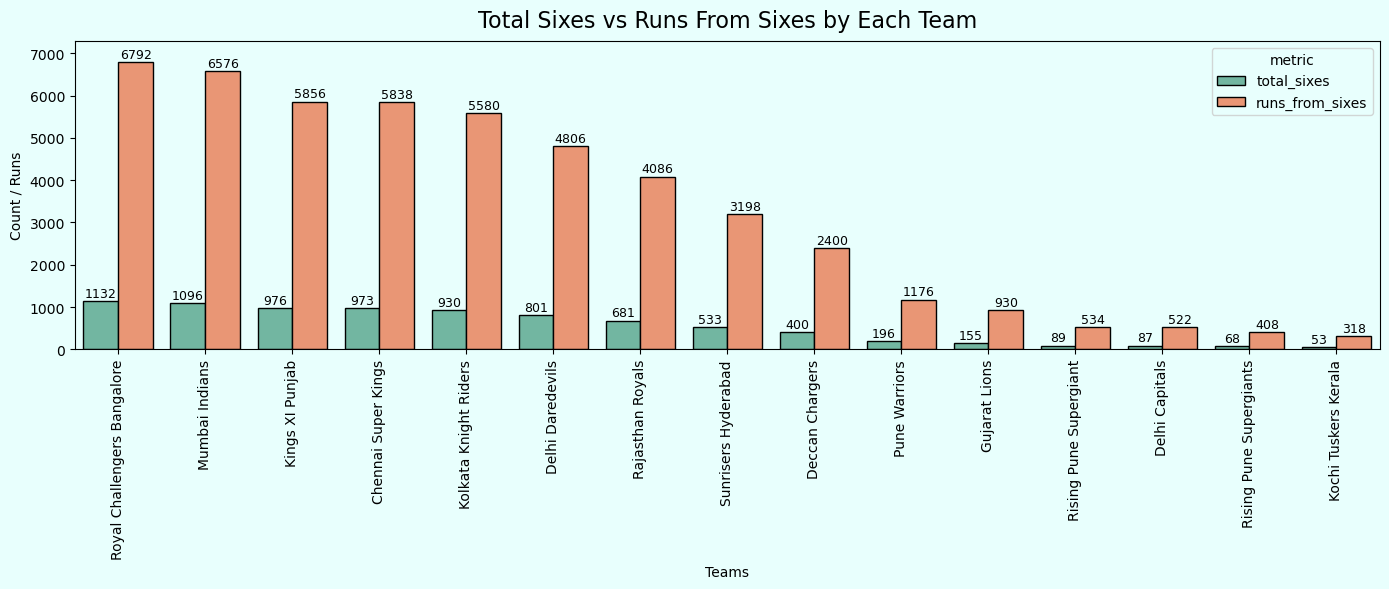

In [154]:
deliveries['is_six'] = deliveries['batsman_runs'] == 6

sixes_by_team = deliveries[deliveries['is_six']].groupby('batting_team').size().sort_values(ascending=False)
six_runs_by_team = sixes_by_team * 6

six_data = pd.DataFrame({
    'total_sixes': sixes_by_team,
    'runs_from_sixes': six_runs_by_team
})

six_data_reset = six_data.reset_index().rename(columns={'batting_team': 'team'})

plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'
sns.set_palette('Set2')

six_melt = six_data_reset.melt(
    id_vars='team',
    value_vars=['total_sixes', 'runs_from_sixes'],
    var_name='metric',
    value_name='value'
)

ax = sns.barplot(data=six_melt, x='team', y='value', hue='metric', edgecolor='black')

plt.title('Total Sixes vs Runs From Sixes by Each Team', fontsize=16, pad=10)
plt.xlabel('Teams')
plt.ylabel('Count / Runs')
plt.xticks(rotation=90)
plt.ylim(0, six_melt['value'].max() + 500)

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    metric_label = p.get_facecolor()  
    if height < 50:
        continue
    x = p.get_x() + p.get_width() / 2
    y = height + 100
    ax.text(x, y, int(height), ha='center', fontsize=9)
    
plt.tight_layout()
plt.show()

# The number of sixes hit in each season

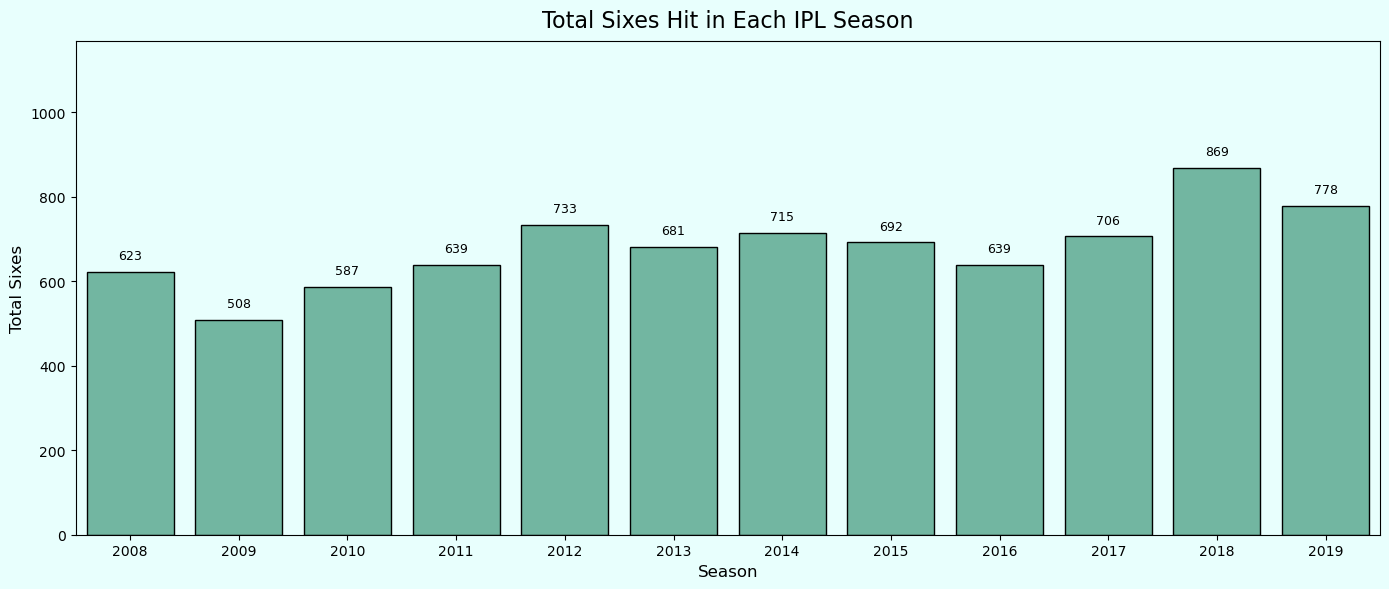

In [155]:
deliveries['is_six'] = deliveries['batsman_runs'] == 6

deliveries_with_season = deliveries.merge(
    matches[['id', 'season']],
    left_on='match_id',
    right_on='id',
    how='left'
)

sixes_by_season = (
    deliveries_with_season[deliveries_with_season['is_six']]
    .groupby('season')
    .size()
    .sort_index()
)

sixes_season_df = sixes_by_season.reset_index()
sixes_season_df.columns = ['season', 'total_sixes']

plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'
sns.set_palette('Set2')

ax = sns.barplot(
    data=sixes_season_df,
    x='season',
    y='total_sixes',
    edgecolor='black'
)

plt.title('Total Sixes Hit in Each IPL Season', fontsize=16, pad=10)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Sixes', fontsize=12)
plt.ylim(0, sixes_season_df['total_sixes'].max() + 300)

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 30
    ax.text(x, y, int(height), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# The top 10 leading run scorers in IPL

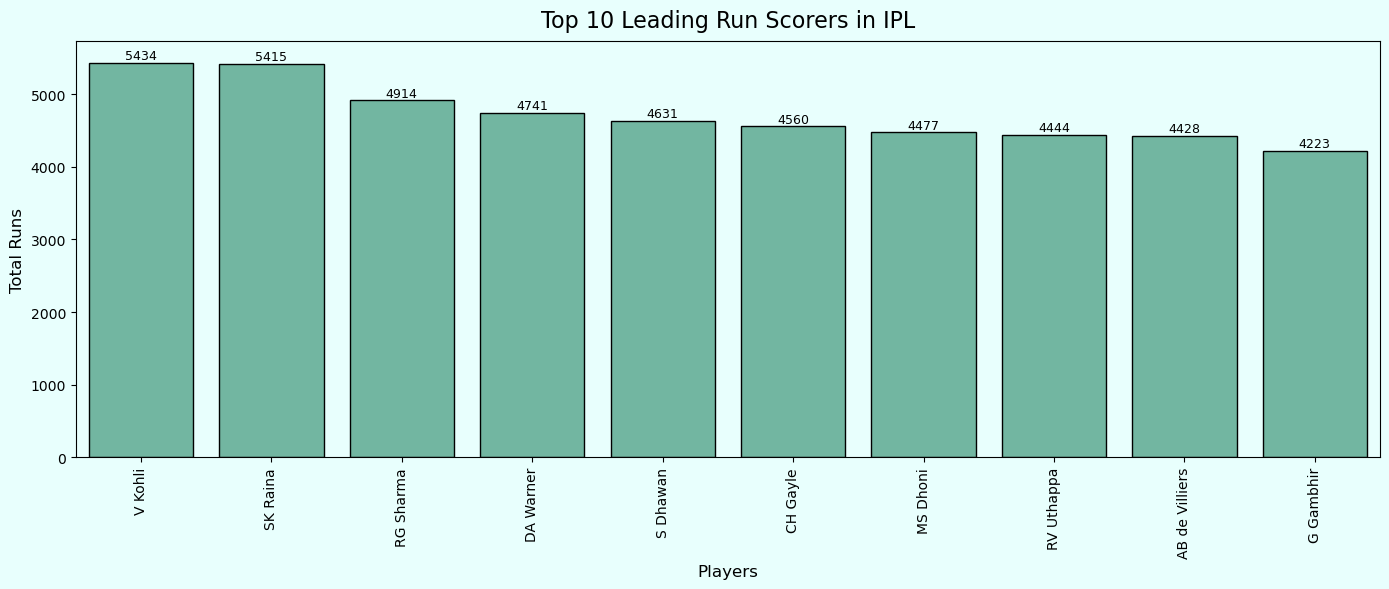

In [156]:
batsman_runs = (
    deliveries.groupby('batsman')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
)

top10_batsmen = batsman_runs.head(10).reset_index()
top10_batsmen.columns = ['batsman', 'total_runs']

plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = '#E8FFFD'
plt.rcParams['figure.facecolor'] = '#E8FFFD'
sns.set_palette('Set2')

ax = sns.barplot(
    data=top10_batsmen,
    x='batsman',
    y='total_runs',
    edgecolor='black'
)

plt.title('Top 10 Leading Run Scorers in IPL', fontsize=16, pad=10)
plt.xlabel('Players', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, top10_batsmen['total_runs'].max() + 300)

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 50
    ax.text(x, y, int(height), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# Conclusion

1) The analysis of IPL data reveals that winning the toss provides teams with a slight advantage, with approximately 50-55% of toss winners going on to win their matches.
2) The data confirms that teams generally prefer chasing, with field-first decisions being more common and statistically favorable in T20 conditions.
3) Boundary hitting has increased significantly over the seasons, indicating evolving batting strategies and power-hitting trends.
4) The Mumbai Indians emerge as the most successful franchise with the highest win count, while certain venues like Eden Gardens and Wankhede Stadium dominate as preferred match locations.
5) Batting giants like Virat Kohli, Suresh Raina, David Warner, and Rohit Sharma featured as top run-scorers, while several key players dominated the Player of the Match awards, indicating strong match-winning influence.